In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
import pandas as pd

In [5]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [93]:
def getPhraseList(cur_inp_file, only_match_correct=True, topk=1):
    print("Using file = ", cur_inp_file)
    with open(cur_inp_file, "r") as f:
        data = json.load(f)
    
    imp_phrase_list = []
    for cur_record in data:
        if only_match_correct:
            if type(cur_record["predicted_label"]) is str and cur_record["label"] != cur_record["predicted_label"]:
                continue
            
            if type(cur_record["predicted_label"]) is int and cur_record["label_idx"] != cur_record["predicted_label"]:
                continue
                
        for idx, cur_phrase in enumerate(cur_record["important_phrases"]):
            if idx >= topk:
                break
                
            imp_phrase_list.append(cur_phrase[1])
    
    df = pd.DataFrame(data=imp_phrase_list, columns=["important_phrase"])
    return df

In [123]:
def plotDF(cur_df, cur_inp_file, topk=20):
    
    title = cur_inp_file.split("/")[-1].split(".")[0]
    
    print("Total number of samples = ", df.shape[0])
    
    # Word cloud plot
    df["important_phrase_extended"] = df["important_phrase"].astype(str) + " "
    phrase_list = list(df["important_phrase_extended"])
    show_wordcloud(phrase_list, title="Word cloud for " + title)
    
#     stopwords = list(set(STOPWORDS))
#     phrase_list_new = []
#     phrase_list = list(df["important_phrase"])
#     for i in phrase_list:
#         if i in stopwords:
#             continue
#         phrase_list_new.append(i)
#     df_temp = pd.DataFrame(data=phrase_list_new, columns=["important_phrase"])

    # Bar plot
    counter = df["important_phrase"].value_counts()[0:topk]
    plt.figure(figsize=(15,7))
    plt.title("Bar plot for " + title)
    plt.xticks(rotation=90)
    plt.bar(counter.index, counter.values)

In [102]:
# Config:
topk_phrase = 1
topk_barplot = 20

# For Sample Size Entity:

## Using SOC on NER SEQ model:

Using file =  ner_phrase_extractions/repr_ner_seq_custom_derive_SS.json
Total number of samples =  32


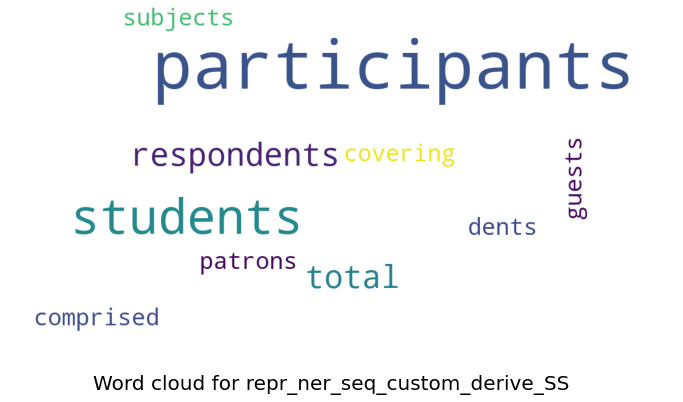

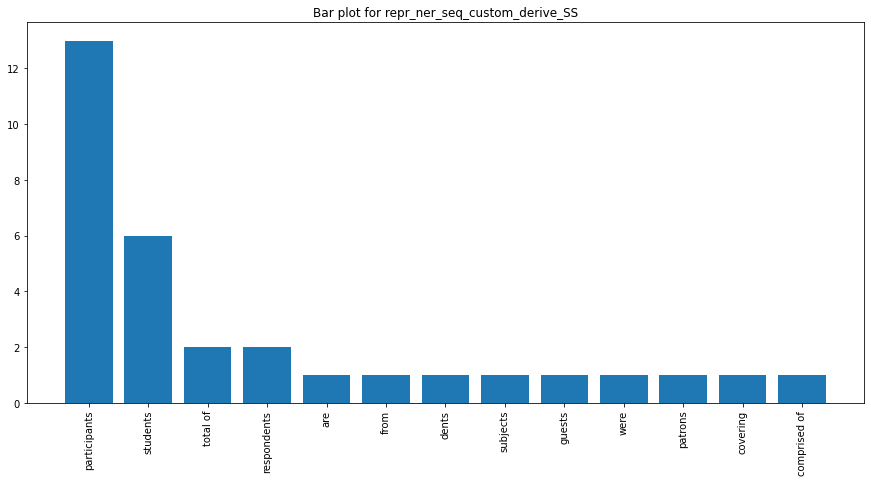

In [124]:
inp_file = "ner_phrase_extractions/repr_ner_seq_custom_derive_SS.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)

## Using SOC on NER TC model:

Using file =  ner_phrase_extractions/repr_ner_tc_custom_derive_SS.json
Total number of samples =  33


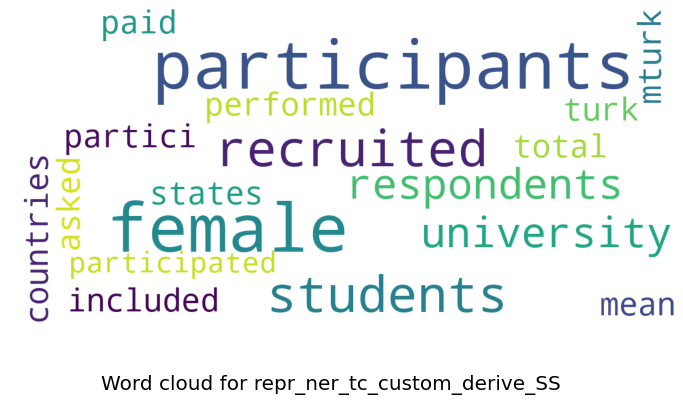

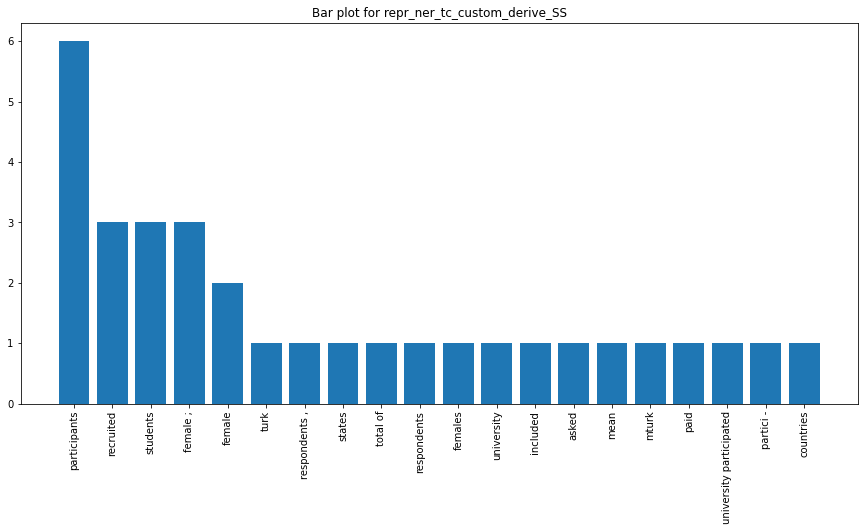

In [125]:
inp_file = "ner_phrase_extractions/repr_ner_tc_custom_derive_SS.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)

# For Model name Entity:

## Using SOC on NER SEQ model:

Using file =  ner_phrase_extractions/repr_ner_seq_custom_derive_TN.json
Total number of samples =  38


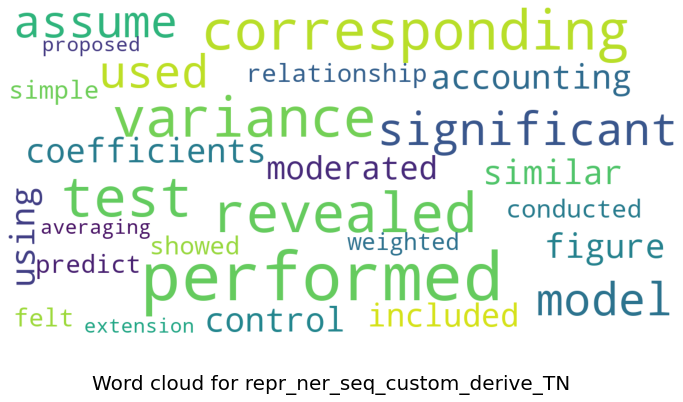

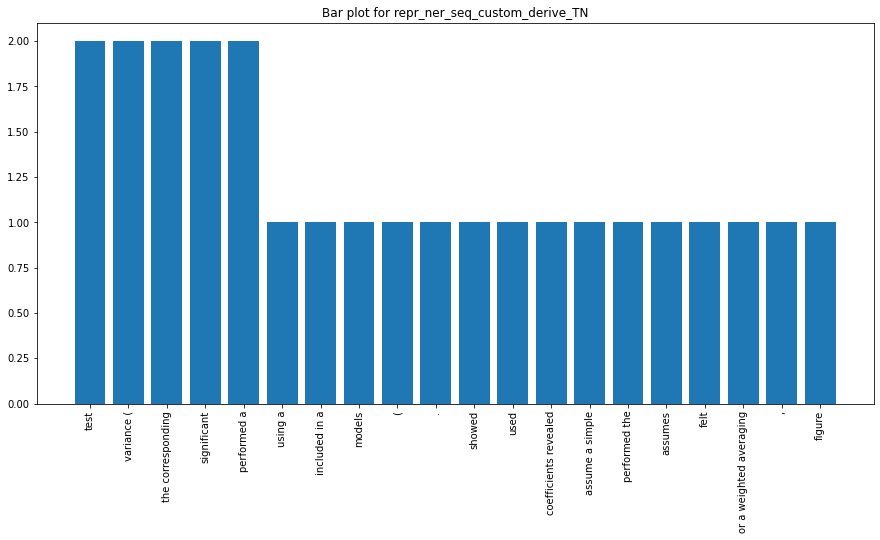

In [126]:
inp_file = "ner_phrase_extractions/repr_ner_seq_custom_derive_TN.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)

## Using SOC on NER TC model:

Using file =  ner_phrase_extractions/repr_ner_tc_custom_derive_TN.json
Total number of samples =  69


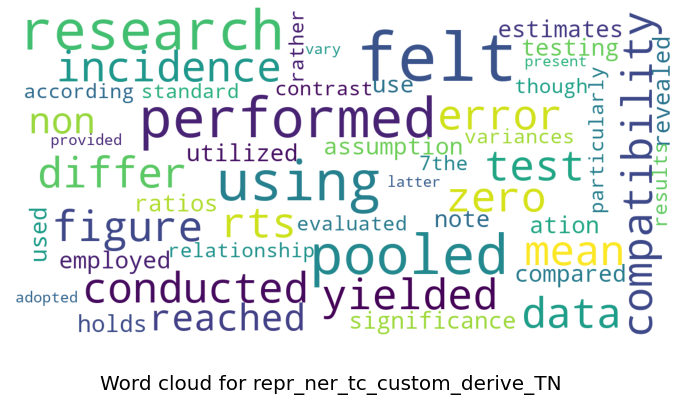

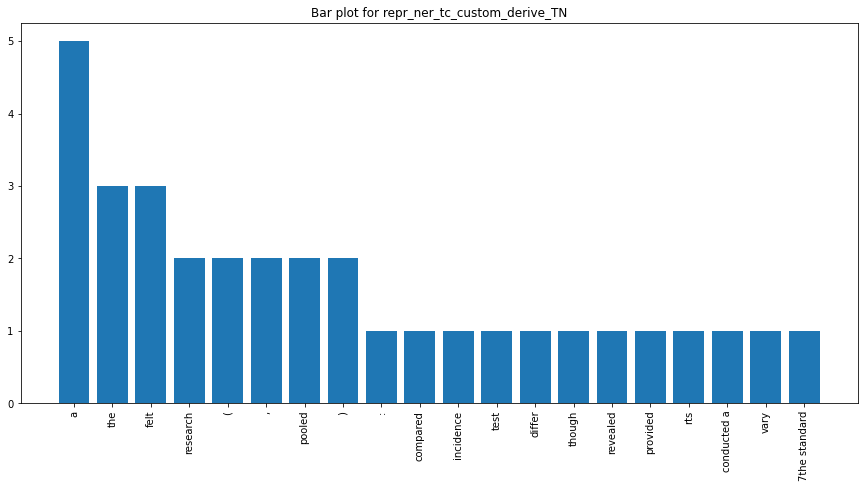

In [127]:
inp_file = "ner_phrase_extractions/repr_ner_tc_custom_derive_TN.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)

# For Sampling method Entity:

## Using SOC on NER SEQ model:

Using file =  ner_phrase_extractions/repr_ner_seq_custom_derive_SP.json
Total number of samples =  8


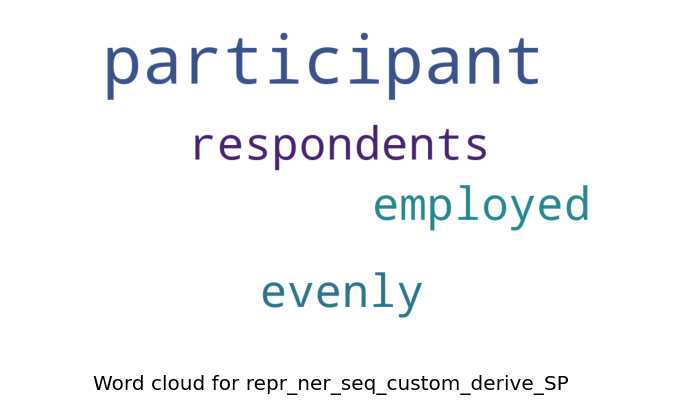

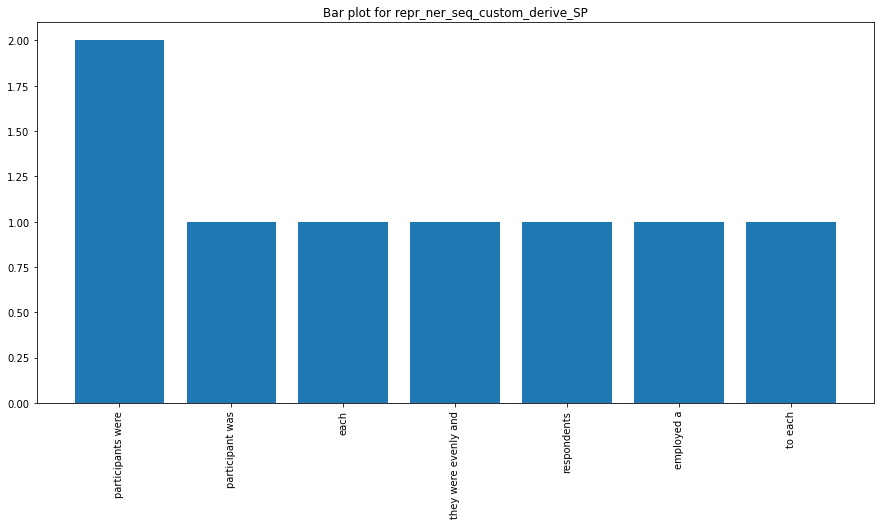

In [128]:
inp_file = "ner_phrase_extractions/repr_ner_seq_custom_derive_SP.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)

## Using SOC on NER TC model:

Using file =  ner_phrase_extractions/repr_ner_tc_custom_derive_SP.json
Total number of samples =  29


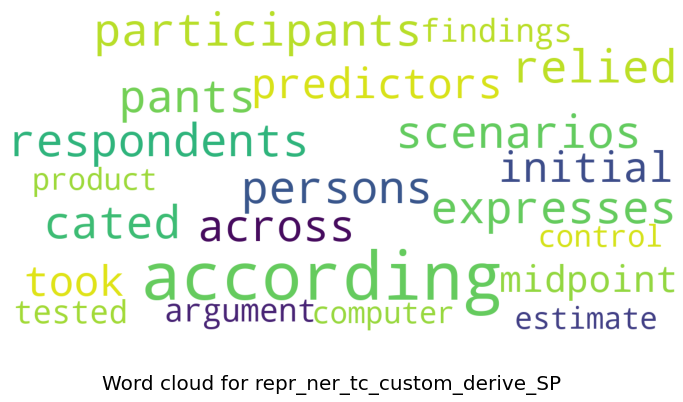

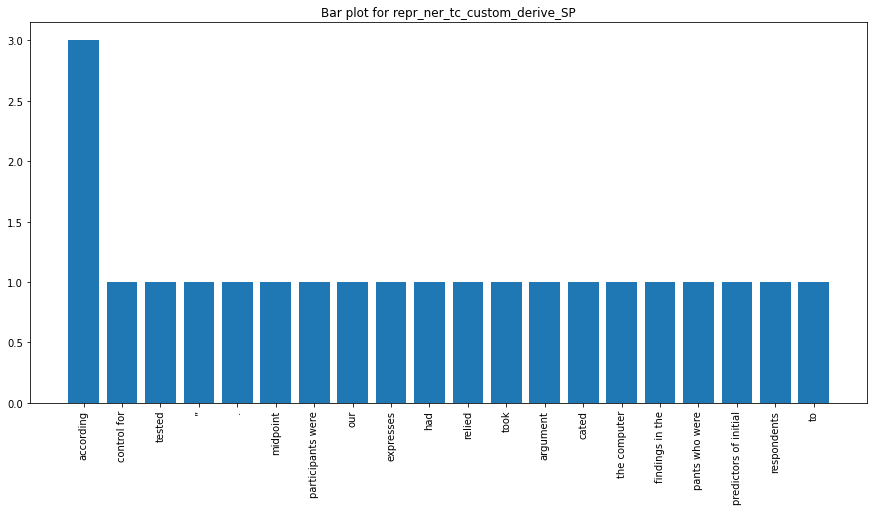

In [129]:
inp_file = "ner_phrase_extractions/repr_ner_tc_custom_derive_SP.json"

df = getPhraseList(inp_file, only_match_correct=True, topk=topk_phrase)
plotDF(df, inp_file, topk=topk_barplot)